## Get data

In [1]:
import requests               
from bs4 import BeautifulSoup 
import pickle   
import numpy as np

In [2]:
#definition to get text
def transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/',
        'https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/pete-davidson-alive-from-new-york-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/',
        'https://scrapsfromtheloft.com/comedy/trevor-noah-afraid-dark-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-paper-tiger-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-shameless-2007-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/',
        'https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/gabriel-fluffy-iglesias-one-show-fits-all-transcript/',
        'https://scrapsfromtheloft.com/comedy/tiffany-haddish-black-mitzvah-transcript/',
        'https://scrapsfromtheloft.com/comedy/hannah-gadsby-nanette-transcript/',
        'https://scrapsfromtheloft.com/comedy/hannah-gadsby-douglas-transcript/',
        'https://scrapsfromtheloft.com/comedy/amy-schumer-growing-transcript/'
        ]


In [3]:
#url= 'https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/'
#page = requests.get(url).text
#soup = BeautifulSoup(page, "lxml")
 

# URLs of transcripts in scope


In [4]:
#result = soup.find('p')
#result = job_element.find("p", p style="text-align: justify;")
#print(soup.find_all('p',style=lambda value: value and 'text-align:justify' in value)
#print(soup.find_all("p",style=lambda value: value and 'text-align:justify' ))
     # .find_all("p",style=lambda value: value and 'text-align:justify').text
    
#print(soup.find_all('p'))

In [5]:
transcripts = [transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/
https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/
https://scrapsfromtheloft.com/comedy/pete-davidson-alive-from-new-york-transcript/
https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/
https://scrapsfromtheloft.com/comedy/trevor-noah-afraid-dark-2017-full-transcript/
https://scrapsfromtheloft.com/comedy/bill-burr-paper-tiger-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/
https://scrapsfromtheloft.com/comedy/louis-c-k-shameless-2007-full-transcript/
https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/
https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/
https://scrapsfromtheloft.com/comedy/gabriel-fluffy-iglesias-one-show-fits-all-transcript/
https://scrapsfromtheloft.co

In [6]:
comedians = ['jimmy o yang', 'ali wong','pete-davidson','dave-chappelle',
             'trevor-noah','bill-burr','john-mulaney_1','john-mulaney_2','louis-c-k','hasan-minhaj','kevin-hart','gabriel-fluffy-iglesias','tiffany-haddish','hannah-gadsby1','hannah-gadsby2','amy-schumer']
gender = ['m', 'f','m','m',
             'm','m','m','m','m','m','m','m','f','f','f','f']

In [7]:
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [8]:
# Load pickle file
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [9]:
data.keys() ,data['ali wong'][:1]

(dict_keys(['jimmy o yang', 'ali wong', 'pete-davidson', 'dave-chappelle', 'trevor-noah', 'bill-burr', 'john-mulaney_1', 'john-mulaney_2', 'louis-c-k', 'hasan-minhaj', 'kevin-hart', 'gabriel-fluffy-iglesias', 'tiffany-haddish', 'hannah-gadsby1', 'hannah-gadsby2', 'amy-schumer']),
 ['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.'])

In [10]:
#combine data function
def combine(list_text):
    return ' '.join(list_text)

In [11]:
data_combo = {key:combine(value) for key,value in data.items()}

In [12]:
import pandas as pd
pd.set_option('max_colwidth',200)

data_df=pd.DataFrame.from_records([data_combo],index = ['script']).transpose()
#data_df =data_df.sort_index()

data_df['gender'] = gender
data_df

,script,gender
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get...",m
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m
bill-burr,"Recorded Live at the Royal Albert Hall, London, England [cheering and applause] [female announcer] Ladies and gentlemen, please welcome Bill Burr! All right, thank you. Thank you very much. Thank ...",m
john-mulaney_1,[organ music playing] Welcome to Radio City Music Hall. It’s time. Any questions? No. Walk with me. [eerie organ music playing] [mechanical whirring] [audience applauding and cheering] Good evenin...,m
john-mulaney_2,"[funky 90’s beat and cityscape pan] [singing] ♬ New in town, [John Mulaney jumps out of apartment with rolled up papers] ♬ John Mulaney’s New In Town… [John tries to put mustard on his hot dog and...",m
louis-c-k,"Please welcome Louis C.K.! Thank you. Thank you. Thank you. Thank you, thanks, that’s very nice. Hello, everybody. How are ya? Woo! Good, thanks for- thank you, oh, good. Thanks, thanks for coming...",m
hasan-minhaj,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you want to do the special? LA, Chicago, New York?” I wa...",m


In [13]:
data_df.index

Index(['jimmy o yang', 'ali wong', 'pete-davidson', 'dave-chappelle',
       'trevor-noah', 'bill-burr', 'john-mulaney_1', 'john-mulaney_2',
       'louis-c-k', 'hasan-minhaj', 'kevin-hart', 'gabriel-fluffy-iglesias',
       'tiffany-haddish', 'hannah-gadsby1', 'hannah-gadsby2', 'amy-schumer'],
      dtype='object')

In [14]:
print(data_df['script']['ali wong'][0:100])

Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo


## Treat Text

In [15]:
df = data_df['script']
df['ali wong'][0:100]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo'

In [16]:
#Text: remove numbers, captila letter and puctuation
import re
import string
#remove numer
alphanumeric= lambda x: re.sub('\w*\d\w*',' ',x)
# remove punctuation 
#lower case
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())
#df['ali wong']=df.map(alphanumeric)
data_df['script'] = data_df['script'].map(alphanumeric)#.map(punc_lower)
# remove  \n save for sentence tokenizer
#data_df['script'] = data_df['script'].map(lambda x: re.sub('\n',' ',x))


In [17]:
data_df['script']['ali wong'][0:100]


'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo'

## Sentence Tokenization

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
#Works if keep punctuation
sentences = sent_tokenize(data_df['script']['ali wong'])
sentences

['Ladies and gentlemen, please welcome to the stage: Ali Wong!',
 'Hi.',
 'Hello!',
 'Welcome!',
 'Thank you!',
 'Thank you for coming.',
 'Hello!',
 'Hello.',
 'We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes.',
 'But thank you, everybody, so much for coming.',
 'Um… It’s a very exciting day for me.',
 'It’s been a very exciting year for me.',
 'I turned   this year.',
 'Yes!',
 'Thank you, five people.',
 'I appreciate that.',
 'Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you.',
 'I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous.',
 'I’m jealous, first and foremost, of their metabolism.',
 'Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right?',
 'They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potent

In [20]:
sentences.pop()

'All rights reserved.'

In [21]:
sentences.pop()

'©   Scraps from the Loft.'

In [22]:
sentences.pop(0)
sentences

['Hi.',
 'Hello!',
 'Welcome!',
 'Thank you!',
 'Thank you for coming.',
 'Hello!',
 'Hello.',
 'We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes.',
 'But thank you, everybody, so much for coming.',
 'Um… It’s a very exciting day for me.',
 'It’s been a very exciting year for me.',
 'I turned   this year.',
 'Yes!',
 'Thank you, five people.',
 'I appreciate that.',
 'Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you.',
 'I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous.',
 'I’m jealous, first and foremost, of their metabolism.',
 'Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right?',
 'They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.',
 'And then, when they go to sleep, 

## Topic Modeling

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term = vectorizer.fit_transform(data_df['script'])
doc_term.shape

(16, 8570)

In [24]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=data_df.index, columns=vectorizer.get_feature_names())
doc_term_df

,aaaah,aaaand,aaand,aah,abandon,abc,abigail,ability,able,ableist,...,zo,zombie,zombies,zone,zoo,zoomed,zurich,zyrtec,és,órale
jimmy o yang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ali wong,0,0,0,0,0,1,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
pete-davidson,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
dave-chappelle,1,0,0,2,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
trevor-noah,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bill-burr,0,0,0,0,0,0,1,0,7,0,...,0,0,0,0,1,1,0,0,0,0
john-mulaney_1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,0,0,1,0,0
john-mulaney_2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
louis-c-k,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan-minhaj,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(2)
lsa.fit(doc_term)
lsa

TruncatedSVD()

In [26]:
topic_term = lsa.components_.round(3)
topic_term

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.001],
       [ 0.   , -0.001, -0.001, ..., -0.   ,  0.001,  0.002]])

In [27]:
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2"],
                columns = vectorizer.get_feature_names())
topic_term_df

,aaaah,aaaand,aaand,aah,abandon,abc,abigail,ability,able,ableist,...,zo,zombie,zombies,zone,zoo,zoomed,zurich,zyrtec,és,órale
component_1,0.0,0.000,0.000,0.003,0.0,0.000,0.000,0.000,0.005,0.0,...,0.000,0.0,0.000,0.000,0.001,0.000,0.0,0.0,0.000,0.001
component_2,0.0,-0.001,-0.001,0.005,0.0,0.001,0.001,0.001,0.013,0.0,...,0.002,-0.0,0.002,0.002,0.000,0.001,0.0,-0.0,0.001,0.002


In [28]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words


In [29]:
output = display_topics(lsa, vectorizer.get_feature_names(), 5)



Topic  1
like, know, just, don, right

Topic  2
cking, just, ck, don, laughter




In [30]:
doc_topic = lsa.transform(doc_term)
doc_topic_df = pd.DataFrame(doc_topic.round(5), index =data_df.index, columns = ["Feature 1", "Funny"])
doc_topic_df

,Feature 1,Funny
jimmy o yang,308.83041,-41.28130
ali wong,188.42450,-3.75665
pete-davidson,459.80842,-144.02693
dave-chappelle,183.78452,25.98509
trevor-noah,251.70197,20.94750
bill-burr,396.90010,153.47270
john-mulaney_1,201.26138,-26.34086
john-mulaney_2,314.45954,-111.74280
louis-c-k,314.14886,-16.45108
hasan-minhaj,280.13377,-30.73212


In [31]:
## Distance # CHECK!!! Can I use Iloc? 
doc_topic_df.iloc[6]

Feature 1    201.26138
Funny        -26.34086
Name: john-mulaney_1, dtype: float64

In [32]:
from numpy.linalg import norm
#john mulaney against himself
norm(doc_topic_df.iloc[6]- doc_topic_df.iloc[7])

141.80026369210037

In [33]:
norm(doc_topic_df.iloc[3]- doc_topic_df.iloc[7])

189.85503031484973

In [34]:
##Computer all distances
#from sklearn.metrics import pairwise_distances

#dist = pairwise_distances(doc_topic_df.reshape(1,-1),doc_topic_df)

In [35]:
from scipy.linalg import svd

U, Sigma, VT = svd(doc_topic_df)

In [36]:
VT = VT[:3,:]
pd.DataFrame(VT)

,0,1
0,-1.000000e+00,6.283037e-10
1,-6.283037e-10,-1.000000e+00


In [37]:
pd.DataFrame(VT.T)

,0,1
0,-1.000000e+00,-6.283037e-10
1,6.283037e-10,-1.000000e+00


In [38]:
U = U[:,:3]
pd.DataFrame(U)

,0,1,2
0,-0.278985,0.125521,-0.532213
1,-0.170215,0.011423,0.326337
2,-0.415373,0.437932,0.670242
3,-0.166024,-0.079011,-0.031433
4,-0.227378,-0.063694,-0.060636
5,-0.358544,-0.466653,0.049070
6,-0.181812,0.080093,-0.100249
7,-0.284071,0.339768,-0.241429
8,-0.283790,0.050022,-0.126850
9,-0.253062,0.093445,-0.132411


In [39]:
Sigma = Sigma[:3]
pd.DataFrame(np.diag(Sigma))

,0,1
0,1106.976898,0.000000
1,0.000000,328.879378


<IPython.core.display.Javascript object>


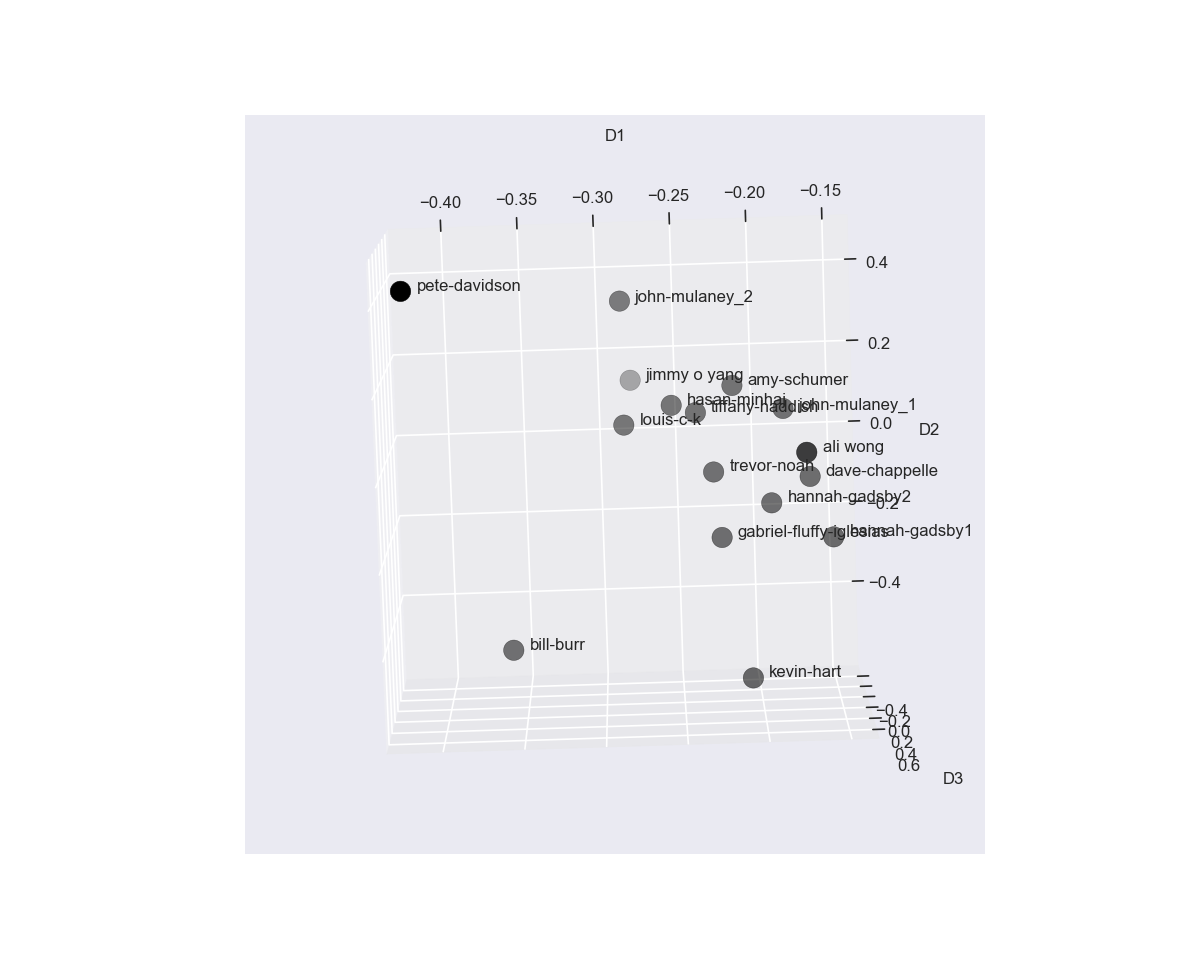

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn')

#fig = plt.figure() #figsize=(20,16)
fig = plt.figure(figsize=(10,8)) #figsize=(20,16)
ax = fig.gca(projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,2],c='k',s=150);
ax.set_xlabel("D1", fontsize=10, labelpad=20)
ax.set_ylabel("D2", fontsize=10, labelpad=20)
ax.set_zlabel("D3", fontsize=10, labelpad=20);

lbls = doc_topic_df.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0]+offset,U[i,1],U[i,2],txt, fontsize=10)
    else:
        ax.text(U[i,0]+offset,U[i,1],U[i,2]+5*offset,txt, fontsize=10)


## Initial finding 

John mulaney and ali wong are more similiar than john mulaney and pete davidson. If a user liked john mulaney, I would recommend the user ali wong, since the distance is small from the 3d map. 

I used two john mulaney scripts as a test (assume the same person would have similiar style). It seems the two scripts represents different style. 


## no punctuation

In [41]:
# text without punc 
data_df['script_no_punc'] =data_df['script'] .map(alphanumeric).map(punc_lower)
data_df['script_no_punc']['ali wong'][0:101]

'ladies and gentlemen  please welcome to the stage  ali wong  hi  hello  welcome  thank you  thank you'

In [42]:
words_re_no_punc = RegexpTokenizer("\s+",gaps = True).tokenize(data_df['script_no_punc']['ali wong'])
words_re_no_punc

['ladies',
 'and',
 'gentlemen',
 'please',
 'welcome',
 'to',
 'the',
 'stage',
 'ali',
 'wong',
 'hi',
 'hello',
 'welcome',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'coming',
 'hello',
 'hello',
 'we',
 'are',
 'gonna',
 'have',
 'to',
 'get',
 'this',
 'shit',
 'over',
 'with',
 '’cause',
 'i',
 'have',
 'to',
 'pee',
 'in',
 'like',
 'ten',
 'minutes',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'coming',
 'um…',
 'it’s',
 'a',
 'very',
 'exciting',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'exciting',
 'year',
 'for',
 'me',
 'i',
 'turned',
 'this',
 'year',
 'yes',
 'thank',
 'you',
 'five',
 'people',
 'i',
 'appreciate',
 'that',
 'uh',
 'i',
 'can',
 'tell',
 'that',
 'i’m',
 'getting',
 'older',
 'because',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'automatic',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'even',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',


In [43]:
##Document term matrix

In [44]:
script = data_df['script']

In [45]:
script[0:101]

jimmy o yang               ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong                   Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson              So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle             Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah                [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s hap

## Vectorize

In [46]:
vec= CountVectorizer(stop_words='english',
                      max_df=0.8)

In [47]:
doc_term = vec.fit_transform(script)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
doc_term.shape

(16, 8276)

## Vectorize (frequency)

In [49]:
vec = TfidfVectorizer()

In [50]:
doc_term = vec.fit_transform(words_re_no_punc)

In [51]:
doc_term.shape

(7628, 1533)

In [52]:
i = 1

doc = pd.Series(name=script[i],
                data=doc_term.toarray()[i], 
                index=vec.get_feature_names()) \
        .sort_values(ascending=False)

doc.head()

# Words are connect words, lots curse....

and          1.0
abc          0.0
probably     0.0
proposals    0.0
property     0.0
Name: Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned   this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light 

## Stem

In [53]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [54]:
stemmer = SnowballStemmer("english")

In [55]:
stemmer = LancasterStemmer()
stemmed_list = []
for word in words_re_no_punc:
    stemmed_word = stemmer.stem(word)
    stemmed_list.append(stemmed_word)
### END SOLUTION
stemmed_list

['lady',
 'and',
 'gentlem',
 'pleas',
 'welcom',
 'to',
 'the',
 'stag',
 'al',
 'wong',
 'hi',
 'hello',
 'welcom',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'com',
 'hello',
 'hello',
 'we',
 'ar',
 'gonn',
 'hav',
 'to',
 'get',
 'thi',
 'shit',
 'ov',
 'with',
 '’cause',
 'i',
 'hav',
 'to',
 'pee',
 'in',
 'lik',
 'ten',
 'minut',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'com',
 'um…',
 'it’s',
 'a',
 'very',
 'excit',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'excit',
 'year',
 'for',
 'me',
 'i',
 'turn',
 'thi',
 'year',
 'ye',
 'thank',
 'you',
 'fiv',
 'peopl',
 'i',
 'apprecy',
 'that',
 'uh',
 'i',
 'can',
 'tel',
 'that',
 'i’m',
 'get',
 'old',
 'becaus',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'autom',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'ev',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',
 'i’m',
 'straight',
 'up',
 'jeal',
 'i’m',
 'jeal',


In [56]:
nltk.download('averaged_perceptron_tagger')
pos_list = nltk.pos_tag(words_re_no_punc)
pos_list

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('ladies', 'NNS'),
 ('and', 'CC'),
 ('gentlemen', 'NNS'),
 ('please', 'VBP'),
 ('welcome', 'JJ'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('stage', 'NN'),
 ('ali', 'NN'),
 ('wong', 'JJ'),
 ('hi', 'NN'),
 ('hello', 'VBD'),
 ('welcome', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('thank', 'VBP'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('coming', 'VBG'),
 ('hello', 'JJ'),
 ('hello', 'NN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('gonna', 'RB'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('this', 'DT'),
 ('shit', 'NN'),
 ('over', 'IN'),
 ('with', 'IN'),
 ('’cause', 'NN'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('pee', 'VB'),
 ('in', 'IN'),
 ('like', 'JJ'),
 ('ten', 'NN'),
 ('minutes', 'NNS'),
 ('but', 'CC'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('everybody', 'VBP'),
 ('so', 'RB'),
 ('much', 'JJ'),
 ('for', 'IN'),
 ('coming', 'VBG'),
 ('um…', 'JJ'),
 ('it’s', 'NN'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('exciting', 'JJ'),
 ('day', 'NN'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('it’s', 'VBP'),
 ('been',

In [57]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
vec = CountVectorizer(stop_words='english',
                      min_df=1,  # This is default; this is just a reminder it exists
                      max_df=0.8)
                     # preprocessor=prep)

In [59]:
doc_term = vec.fit_transform(script)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## LSA

In [60]:
data_df['script'][0:10]

jimmy o yang      ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong          Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson     So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle    Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah       [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. 

In [61]:
vec = CountVectorizer(stop_words='english')
doc_term = vec.fit_transform(data_df['script'])

lsa=TruncatedSVD(10)
lsa.fit(doc_term)

TruncatedSVD(n_components=10)

In [62]:
lsa.components_

array([[ 0.00014998,  0.00025662,  0.00025662, ...,  0.00016424,
         0.00020177,  0.0006053 ],
       [ 0.00024024, -0.00103311, -0.00103311, ..., -0.00024353,
         0.00065636,  0.00196907],
       [-0.00014815,  0.00176096,  0.00176096, ...,  0.00072424,
         0.00090844,  0.00272533],
       ...,
       [-0.00050509, -0.00103793, -0.00103793, ...,  0.00037167,
        -0.00037658, -0.00112973],
       [ 0.00050988,  0.00219215,  0.00219215, ..., -0.00126745,
         0.00260768,  0.00782305],
       [ 0.000207  , -0.00106533, -0.00106533, ...,  0.00499249,
        -0.00017953, -0.00053859]])

In [63]:
vec.get_feature_names()
# too many words

['aaaah',
 'aaaand',
 'aaand',
 'aah',
 'abandon',
 'abc',
 'abigail',
 'ability',
 'able',
 'ableist',
 'aboard',
 'abomination',
 'aborigines',
 'abortion',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutes',
 'absorbing',
 'abuse',
 'abused',
 'abusive',
 'academically',
 'academics',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accomplishments',
 'according',
 'accordingly',
 'accordion',
 'accountable',
 'accurate',
 'accusations',
 'accusatory',
 'accuse',
 'accused',
 'accusing',
 'accutane',
 'aches',
 'achieve',
 'achoo',
 'acknowledging',
 'acoustic',
 'acquainted',
 'acquisitions',
 'acres',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activates',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actresses',
 'acts',
 'actual',
 'actually',
 'acute',
 'ad',
 'add',
 'addams',
 'added',
 'adderall',
 'addic',

In [64]:
vec= TfidfVectorizer(stop_words='english')
doc_term = vec.fit_transform(data_df['script'])

lsa=TruncatedSVD(15)
lsa.fit(doc_term)

TruncatedSVD(n_components=15)

In [65]:
lsa.components_

array([[ 1.18155705e-03,  4.79882957e-04,  4.79882957e-04, ...,
         8.30664035e-04,  4.71913694e-04,  1.41574108e-03],
       [-9.01336915e-05, -5.60740877e-04, -5.60740877e-04, ...,
        -8.20267163e-04,  1.23481299e-03,  3.70443896e-03],
       [-1.85202319e-03,  2.38219436e-03,  2.38219436e-03, ...,
         2.37016156e-03,  2.27975466e-03,  6.83926397e-03],
       ...,
       [-5.36574505e-03,  5.61131430e-04,  5.61131430e-04, ...,
        -1.75959775e-03, -2.94568518e-05, -8.83705555e-05],
       [ 3.41028045e-03, -1.01232252e-04, -1.01232252e-04, ...,
        -6.01845321e-04,  8.46016641e-05,  2.53804992e-04],
       [ 6.67665388e-03,  1.59353184e-04,  1.59353184e-04, ...,
         8.25795744e-04, -1.12789747e-03, -3.38369241e-03]])

In [66]:
vec.get_feature_names()
# still too many words

['aaaah',
 'aaaand',
 'aaand',
 'aah',
 'abandon',
 'abc',
 'abigail',
 'ability',
 'able',
 'ableist',
 'aboard',
 'abomination',
 'aborigines',
 'abortion',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutes',
 'absorbing',
 'abuse',
 'abused',
 'abusive',
 'academically',
 'academics',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accomplishments',
 'according',
 'accordingly',
 'accordion',
 'accountable',
 'accurate',
 'accusations',
 'accusatory',
 'accuse',
 'accused',
 'accusing',
 'accutane',
 'aches',
 'achieve',
 'achoo',
 'acknowledging',
 'acoustic',
 'acquainted',
 'acquisitions',
 'acres',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activates',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actresses',
 'acts',
 'actual',
 'actually',
 'acute',
 'ad',
 'add',
 'addams',
 'added',
 'adderall',
 'addic',

In [67]:
lsa.transform(doc_term)

array([[ 7.81994175e-01, -1.80540313e-01, -8.18679299e-02,
        -2.20795583e-01,  5.61788168e-02, -1.11186008e-01,
         1.20318154e-01, -2.66063582e-02, -1.41798897e-01,
         2.68080314e-01, -1.71271542e-02,  6.41461785e-02,
         9.13766892e-02,  4.05575380e-01, -1.54233228e-02],
       [ 7.71836224e-01, -1.38963743e-01, -1.72163428e-01,
        -1.62049292e-01,  3.70323458e-02, -3.02088242e-02,
         2.52423046e-01, -5.01179440e-02, -1.02594052e-02,
         3.60820967e-01,  6.02365635e-02, -6.66761512e-02,
        -1.48280368e-01, -3.01592754e-01,  8.13284198e-02],
       [ 8.21874419e-01, -2.01745499e-01, -8.73241304e-02,
        -2.19979298e-01,  6.60854341e-02,  1.13463846e-01,
         5.64684944e-02,  1.53290519e-02,  3.57170470e-02,
        -2.85990071e-01, -2.07837645e-02, -7.62637928e-02,
        -9.97832236e-02,  5.73503112e-02, -8.54564885e-02],
       [ 7.61796029e-01, -8.45001298e-03, -1.67098716e-01,
         6.62679414e-02, -1.22167500e-02,  3.64785116

In [68]:
words_re_no_punc

['ladies',
 'and',
 'gentlemen',
 'please',
 'welcome',
 'to',
 'the',
 'stage',
 'ali',
 'wong',
 'hi',
 'hello',
 'welcome',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'coming',
 'hello',
 'hello',
 'we',
 'are',
 'gonna',
 'have',
 'to',
 'get',
 'this',
 'shit',
 'over',
 'with',
 '’cause',
 'i',
 'have',
 'to',
 'pee',
 'in',
 'like',
 'ten',
 'minutes',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'coming',
 'um…',
 'it’s',
 'a',
 'very',
 'exciting',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'exciting',
 'year',
 'for',
 'me',
 'i',
 'turned',
 'this',
 'year',
 'yes',
 'thank',
 'you',
 'five',
 'people',
 'i',
 'appreciate',
 'that',
 'uh',
 'i',
 'can',
 'tell',
 'that',
 'i’m',
 'getting',
 'older',
 'because',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'automatic',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'even',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',


## NMF

In [69]:
from sklearn.decomposition import NMF
vec= TfidfVectorizer(stop_words='english')
doc_term = vec.fit_transform(words_re_no_punc)

nmf=NMF(2)
nmf.fit(doc_term)

C:\Users\wangz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=2)

In [70]:
nmf.components_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
vec.get_feature_names()

['abc',
 'able',
 'absorbing',
 'abuse',
 'abused',
 'accident',
 'accidentally',
 'according',
 'achieve',
 'act',
 'active',
 'activity',
 'actually',
 'address',
 'advantage',
 'advice',
 'affection',
 'afford',
 'age',
 'aggressive',
 'aggressively',
 'ago',
 'ahead',
 'ain',
 'alarmingly',
 'alert',
 'ali',
 'amazing',
 'ambien',
 'amer',
 'america',
 'american',
 'anal',
 'anderson',
 'angeles',
 'angry',
 'animal',
 'annoying',
 'anxieties',
 'anymore',
 'appointments',
 'appreciate',
 'arabic',
 'arch',
 'aren',
 'asia',
 'asian',
 'asians',
 'ask',
 'asked',
 'asks',
 'ass',
 'assist',
 'atari',
 'ate',
 'atlanta',
 'atm',
 'attached',
 'attacking',
 'attending',
 'audience',
 'authentic',
 'automatic',
 'avi',
 'away',
 'ayahuasca',
 'baby',
 'backed',
 'backfired',
 'backpack',
 'bacteria',
 'bad',
 'bald',
 'ballet',
 'bamboozle',
 'bamboozled',
 'ban',
 'banana',
 'bananas',
 'bank',
 'basically',
 'basis',
 'bathroom',
 'bear',
 'beard',
 'beautiful',
 'bed',
 'bedroom',


## LDA -Probabilstic model

In [72]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import MWETokenizer, word_tokenize
from nltk.tag import pos_tag
from nltk.stem.lancaster import LancasterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [73]:
from gensim import corpora, models, matutils
text=data_df['script']

vec = CountVectorizer(stop_words='english', ngram_range=(1, 2))
term_doc = vec.fit_transform(text).transpose()

term_doc.shape

(60537, 16)

In [74]:
sum([len(d.split(' ')) for d in text])

158221

In [75]:
#fitting LDA model
corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=10)

In [76]:
lda.print_topics()

[(0,
  '0.000*"like" + 0.000*"know" + 0.000*"just" + 0.000*"don" + 0.000*"right" + 0.000*"people" + 0.000*"audience" + 0.000*"got" + 0.000*"said" + 0.000*"laughter"'),
 (1,
  '0.012*"like" + 0.006*"audience" + 0.005*"know" + 0.005*"just" + 0.005*"don" + 0.004*"said" + 0.003*"laughs" + 0.003*"right" + 0.003*"laughing" + 0.003*"audience laughs"'),
 (2,
  '0.022*"like" + 0.011*"know" + 0.011*"just" + 0.007*"don" + 0.006*"right" + 0.004*"uh" + 0.004*"yeah" + 0.004*"people" + 0.003*"got" + 0.003*"cking"'),
 (3,
  '0.008*"like" + 0.006*"know" + 0.005*"don" + 0.005*"laughter" + 0.005*"just" + 0.003*"people" + 0.003*"right" + 0.002*"said" + 0.002*"time" + 0.002*"got"'),
 (4,
  '0.010*"like" + 0.003*"know" + 0.003*"don" + 0.003*"dad" + 0.002*"just" + 0.002*"laughter" + 0.002*"going" + 0.002*"want" + 0.002*"got" + 0.002*"love"')]

In [77]:
[doc for doc in lda[corpus]]

[[(2, 0.9998993)],
 [(3, 0.99987304)],
 [(2, 0.9998954)],
 [(2, 0.99988216)],
 [(2, 0.9999046)],
 [(2, 0.99992055)],
 [(1, 0.9998971)],
 [(1, 0.9999302)],
 [(2, 0.9998995)],
 [(4, 0.99991375)],
 [(1, 0.9999226)],
 [(3, 0.99992126)],
 [(1, 0.9999019)],
 [(3, 0.9999191)],
 [(1, 0.9999106)],
 [(2, 0.9998522)]]

In [78]:
text

jimmy o yang               ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong                   Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson              So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle             Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah                [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s hap

## Use topic to compare scripts

## Spacy

In [79]:
#!pip install spacy

In [80]:
#!python -m spacy download en_core_web_sm

In [81]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [82]:
script =  "I read about it on Yelp!” I was like, “It’s not authentic, OK?” You can tell, first and foremost, by the name, ’cause it don’t got a number in it."
doc= nlp(script)

In [83]:
for token in doc:
    print(token.text, token.pos_, token.lemma_, token.is_stop)

I PRON I True
read VERB read False
about ADP about True
it PRON it True
on ADP on True
Yelp PROPN Yelp False
! PUNCT ! False
” PUNCT " False
I PRON I True
was AUX be True
like INTJ like False
, PUNCT , False
“ PUNCT " False
It PRON it True
’s VERB ’ True
not PART not True
authentic ADJ authentic False
, PUNCT , False
OK ADJ ok False
? PUNCT ? False
” PUNCT " False
You PRON you True
can AUX can True
tell VERB tell False
, PUNCT , False
first ADV first True
and CCONJ and True
foremost ADV foremost False
, PUNCT , False
by ADP by True
the DET the True
name NOUN name True
, PUNCT , False
’cause SCONJ ’cause False
it PRON it True
do AUX do True
n’t PART not True
got VERB get False
a DET a True
number NOUN number False
in ADP in True
it PRON it True
. PUNCT . False


In [84]:
#clean up the sentence
sent_cleaned = ''
for token in doc[:-1]:
    if not token.is_stop:
        if not token.pos_ == 'PUNCT':
            sent_cleaned += token.lemma_
            sent_cleaned += ' '
sent_cleaned = sent_cleaned.strip()
### END SOLUTION

sent_cleaned

'read Yelp like authentic ok tell foremost ’cause get number'

In [85]:
data_df['spacy_doc'] = list(nlp.pipe(data_df['script_no_punc']))

In [86]:
data_df.head()

,script,gender,script_no_punc,spacy_doc
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m,announcer ladies and gentlemen welcome to the stage… jimmy o yang cheering music – meter mobb ft too hort “you came to party” how’s everybody doing yes yes thank you thank you guys v...,"(announcer, , ladies, and, gentlemen, , welcome, to, the, stage, …, jimmy, o, , yang, , cheering, , music, –, meter, mobb, ft, too, , hort, , “, you, came, to, party, ”, , how, ’s, every..."
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee i...,"(ladies, and, gentlemen, , please, welcome, to, the, stage, , ali, wong, , hi, , hello, , welcome, , thank, you, , thank, you, for, coming, , hello, , hello, , we, are, gon, na, have, to..."
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...",m,so louis c k tried to get me fired from snl my first year and this is that story so it’s like or ’ uh and it’s the finale of snl and i i was so shocked and happy that i didn’t get fir...,"(so, , louis, c, k, , tried, to, get, me, fired, from, snl, my, first, year, , and, this, is, that, story, , so, , it, ’s, , like, , or, ’, , uh, , and, it, ’s, the, finale, of, snl, ..."
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m,sticks stones is dave chappelle’s fifth netflix special \nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat in leather pants aviator shades and a remar...,"(sticks, , stones, is, dave, chappelle, ’s, fifth, netflix, special, \n, in, the, promotional, trailer, morgan, freeman, narrates, as, chappelle, swaggers, across, a, salt, flat, in, leather, pa..."
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m,audience cheering music playing wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is...,"( , audience, cheering, , music, playing, , wow, , wow, , oh, , wow, , what, ’s, happening, , new, york, , yeah, , oh, , this, is, amazing, , thank, you, for, coming, out, , we, ’re, ..."


In [87]:
# Clean data - take out stop word, punc and numbers,no filter for noun

docs_clean =[[w.lemma_.lower() for w in doc if  (not w.is_stop and not w.is_punct and not w.like_num) \
               and (w.lemma_.lower() not in ['fuck','shit','audience','people','laughter','show',\
                                             'time','guy','way','lot','thing','day','year','applause','bit']) \
               #and (w.pos_=='NOUN') 
             ] for doc in data_df['spacy_doc']]

data_df['docs_clean'] = [' '.join(doc) for doc in docs_clean]
data_df.head()

,script,gender,script_no_punc,spacy_doc,docs_clean
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m,announcer ladies and gentlemen welcome to the stage… jimmy o yang cheering music – meter mobb ft too hort “you came to party” how’s everybody doing yes yes thank you thank you guys v...,"(announcer, , ladies, and, gentlemen, , welcome, to, the, stage, …, jimmy, o, , yang, , cheering, , music, –, meter, mobb, ft, too, , hort, , “, you, came, to, party, ”, , how, ’s, every...",announcer lady gentleman welcome stage jimmy o yang cheer music meter mobb ft hort come party everybody yes yes thank thank come you beautiful great man seat ...
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee i...,"(ladies, and, gentlemen, , please, welcome, to, the, stage, , ali, wong, , hi, , hello, , welcome, , thank, you, , thank, you, for, coming, , hello, , hello, , we, are, gon, na, have, to...",lady gentleman welcome stage ali wong hi hello welcome thank thank come hello hello going to ’cause pee like minute thank everybody come um exciting exciting ...
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...",m,so louis c k tried to get me fired from snl my first year and this is that story so it’s like or ’ uh and it’s the finale of snl and i i was so shocked and happy that i didn’t get fir...,"(so, , louis, c, k, , tried, to, get, me, fired, from, snl, my, first, year, , and, this, is, that, story, , so, , it, ’s, , like, , or, ’, , uh, , and, it, ’s, the, finale, of, snl, ...",louis c k try fire snl story like uh finale snl shocked happy fire feeling relive week awesome believe funny um celebrate know louis c k host loui...
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m,sticks stones is dave chappelle’s fifth netflix special \nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat in leather pants aviator shades and a remar...,"(sticks, , stones, is, dave, chappelle, ’s, fifth, netflix, special, \n, in, the, promotional, trailer, morgan, freeman, narrates, as, chappelle, swaggers, across, a, salt, flat, in, leather, pa...",stick stone dave chappelle netflix special \n promotional trailer morgan freeman narrate chappelle swagger salt flat leather pant aviator shade remarkably long t shirt morgan freeman dav...
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m,audience cheering music playing wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is...,"( , audience, cheering, , music, playing, , wow, , wow, , oh, , wow, , what, ’s, happening, , new, york, , yeah, , oh, , this, is, amazing, , thank, you, for, coming, out, , we, ’re, ...",cheer music play wow wow oh wow happen new york yeah oh amazing thank come going to fun tonight welcome tell dream start stand comedy special new york city ...


In [88]:
#clean data


In [89]:
#docs_list_clean_noun = [token.text.lower() for doc in data_df['spacy_doc_clean'] for token in doc if token.pos_=='NOUN']
#start=''
#docs_list_clean = ''
#for token in docs_list_clean_noun:
 #   print(token)
   # docs_list_clean_noun+=' '+token 
#docs_list_clean[:]
#memory error

In [90]:
#Run topic modeling again on clean data and only on noun 2nd attempt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term = vectorizer.fit_transform(data_df['docs_clean'])
doc_term.shape

(16, 6746)

In [91]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=data_df['docs_clean'].index, columns=vectorizer.get_feature_names())
doc_term_df

,aaaah,aaaand,aaand,aah,ab,abandon,abc,abigail,ability,able,...,zip,zo,zombie,zone,zoo,zoom,zurich,zyrtec,és,órale
jimmy o yang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ali wong,0,0,0,0,0,0,1,0,0,2,...,0,0,1,0,0,0,0,0,0,0
pete-davidson,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
dave-chappelle,1,0,0,2,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
trevor-noah,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bill-burr,0,0,0,0,2,0,0,1,0,7,...,0,0,0,0,1,1,0,0,0,0
john-mulaney_1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,3,0,0,1,0,0
john-mulaney_2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
louis-c-k,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan-minhaj,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

topic_term = lsa.components_.round(3)
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2","component_3", "component_4", "component_5"],
                columns = vectorizer.get_feature_names())
topic_term_df

,aaaah,aaaand,aaand,aah,ab,abandon,abc,abigail,ability,able,...,zip,zo,zombie,zone,zoo,zoom,zurich,zyrtec,és,órale
component_1,0.000,0.000,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.006,...,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001
component_2,0.000,-0.000,-0.000,0.003,0.003,0.000,0.001,0.001,0.001,0.013,...,0.002,0.002,0.002,0.002,0.001,0.001,0.000,0.000,0.001,0.002
component_3,-0.000,-0.002,-0.002,0.002,0.003,-0.000,-0.000,0.002,-0.000,0.012,...,-0.001,0.000,0.000,0.000,-0.001,0.002,-0.000,-0.001,-0.001,-0.002
component_4,0.001,-0.001,-0.001,0.009,-0.006,0.001,0.002,-0.002,0.002,-0.006,...,0.007,0.000,0.001,0.000,-0.003,-0.002,0.001,-0.000,0.001,0.003
component_5,0.000,-0.001,-0.001,0.001,0.002,0.000,0.001,-0.001,0.002,0.003,...,0.007,-0.000,-0.001,-0.000,-0.003,-0.001,-0.001,-0.000,-0.000,-0.001


In [93]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

output = display_topics(lsa, vectorizer.get_feature_names(), 5)



Topic  1
like, know, right, say, look

Topic  2
cke, say, man, ck, going

Topic  3
cke, right, uh, know, ck

Topic  4
man, know, want, fucking, good

Topic  5
laugh, uh, know, clap, right




In [94]:
doc_topic = lsa.transform(doc_term)
doc_topic_df = pd.DataFrame(doc_topic.round(5), index =data_df.index, columns = ["Feature 1", "Feature2",'Audience reaction','laughter','like'])
doc_topic_df

,Feature 1,Feature2,Audience reaction,laughter,like
jimmy o yang,283.41835,-50.26853,-10.62839,7.40087,-77.27119
ali wong,169.78780,-10.51476,6.65773,13.59572,-14.52811
pete-davidson,455.29372,-165.23266,107.74016,-2.79058,56.66844
dave-chappelle,167.64853,24.18109,-0.00463,46.85871,16.23991
trevor-noah,231.77879,20.38092,-23.39036,49.74978,-27.74299
bill-burr,354.37666,132.11891,148.77482,-103.81090,-18.68172
john-mulaney_1,186.99539,7.67851,-68.65101,-20.61497,-1.49284
john-mulaney_2,307.24072,-16.01219,-140.97893,-64.03269,-47.05825
louis-c-k,256.00925,-49.78218,14.13506,46.96623,13.88750
hasan-minhaj,268.39534,-33.40796,-25.40237,24.75411,-69.52716


In [95]:
## take out curses


In [96]:
## Does female and male use the same noun
female = data_df[data_df.gender=='f']
male = data_df[data_df.gender=='m']

In [97]:
f_adj = [token.text.lower() for doc in female.spacy_doc for token in doc if token.pos_=='ADJ']
m_adj = [token.text.lower() for doc in male.spacy_doc for token in doc if token.pos_=='ADJ']

f_noun = [token.text.lower() for doc in female.spacy_doc for token in doc if token.pos_=='NOUN']
m_noun = [token.text.lower() for doc in male.spacy_doc for token in doc if token.pos_=='NOUN']

In [98]:
from collections import Counter
Counter(f_adj).most_common(10)

#pregnant

[('right', 111),
 ('good', 88),
 ('fucking', 64),
 ('little', 62),
 ('first', 52),
 ('more', 42),
 ('pregnant', 39),
 ('other', 36),
 ('much', 35),
 ('different', 31)]

In [99]:
Counter(m_adj).most_common(10)

[('right', 285),
 ('good', 203),
 ('old', 132),
 ('other', 129),
 ('little', 128),
 ('first', 126),
 ('fucking', 113),
 ('white', 89),
 ('black', 86),
 ('great', 82)]

In [100]:
#not meaningful
Counter(f_noun).most_common(10)

[('laughter', 123),
 ('people', 111),
 ('time', 101),
 ('audience', 90),
 ('men', 80),
 ('lot', 78),
 ('women', 72),
 ('man', 72),
 ('day', 67),
 ('bit', 66)]

In [101]:
#not meaningful
Counter(m_noun).most_common(10)

[('people', 383),
 ('laughter', 329),
 ('man', 272),
 ('audience', 259),
 ('time', 241),
 ('shit', 182),
 ('thing', 182),
 ('guy', 173),
 ('dad', 164),
 ('guys', 156)]

In [102]:
#adj modifier -Female
noun_str = 'man'
adj_modifiers = []
top_adj_mod = []

for doc in female.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

['white',
 'new',
 'relatable',
 'funny',
 'fit',
 'young',
 'real',
 'straight',
 'white',
 'straight',
 'white',
 'straight',
 'white',
 'straight',
 'white']

In [103]:
top_adj_mod

[('white', 8),
 ('straight', 7),
 ('young', 2),
 ('new', 1),
 ('relatable', 1),
 ('funny', 1),
 ('fit', 1),
 ('real', 1),
 ('heterosexual', 1),
 ('liberal', 1)]

In [104]:
#adj modifier -male
noun_str = 'man'
adj_modifiers = []
top_adj_mod = []

for doc in male.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)
adj_modifiers[:15]


['great',
 'much',
 'confused',
 'old',
 'asian',
 'old',
 'chinese',
 'old',
 'asian',
 'black',
 'interesting',
 'asian',
 'asian',
 'hit',
 'hit']

In [105]:
top_adj_mod

[('old', 12),
 ('black', 9),
 ('macho', 6),
 ('asian', 5),
 ('hit', 3),
 ('white', 3),
 ('gay', 3),
 ('cking', 3),
 ('young', 2),
 ('good', 2)]

In [106]:
##woman
#adj modifier -Female
noun_str = 'woman'
adj_modifiers = []
top_adj_mod = []

for doc in female.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

['grown',
 'asian',
 'grown',
 'right',
 'white',
 'aged',
 'only',
 'broken',
 'olde',
 'visual']

In [107]:
top_adj_mod

[('grown', 2),
 ('asian', 1),
 ('right', 1),
 ('white', 1),
 ('aged', 1),
 ('only', 1),
 ('broken', 1),
 ('olde', 1),
 ('visual', 1)]

In [108]:
##woman
#adj modifier -mzle
noun_str = 'woman'
adj_modifiers = []
top_adj_mod = []

for doc in male.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

['beautiful',
 'beautiful',
 'black',
 'white',
 'first',
 'poor',
 'human',
 'real',
 'real',
 'proud',
 'american',
 'jewish',
 'beautiful',
 'beautiful',
 'beautiful']

In [109]:
top_adj_mod

[('beautiful', 5),
 ('white', 3),
 ('real', 2),
 ('black', 1),
 ('first', 1),
 ('poor', 1),
 ('human', 1),
 ('proud', 1),
 ('american', 1),
 ('jewish', 1)]

In [110]:
#life
#adj modifier -Female
noun_str = 'life'
adj_modifiers = []
top_adj_mod = []

for doc in female.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

['mid', 'whole', 'entire', 'best', 'tough', 'fucking', 'entire', 'own']

In [111]:
top_adj_mod

[('entire', 2),
 ('mid', 1),
 ('whole', 1),
 ('best', 1),
 ('tough', 1),
 ('fucking', 1),
 ('own', 1)]

In [112]:
#life
#adj modifier -Female
noun_str = 'life'
adj_modifiers = []
top_adj_mod = []

for doc in male.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

['real',
 'real',
 'real',
 'great',
 'perfect',
 'fucking',
 'entire',
 'whole',
 'whole',
 'whole',
 'whole',
 'young',
 'entire',
 'wonderful',
 'different']

In [113]:
top_adj_mod

[('whole', 5),
 ('real', 4),
 ('entire', 4),
 ('cking', 3),
 ('everyday', 2),
 ('great', 1),
 ('perfect', 1),
 ('fucking', 1),
 ('young', 1),
 ('wonderful', 1)]

## Scatter text

In [114]:
import scattertext as st

In [115]:
df_small=data_df[['gender','script_no_punc']]

comedian_s = ['jimmy o yang', 'ali wong','pete-davidson','dave-chappelle',
             'trevor-noah','bill-burr','john-mulaney_1','john-mulaney_2','louis-c-k','hasan-minhaj','kevin-hart','gabriel-fluffy-iglesias','tiffany-haddish','hannah-gadsby1','hannah-gadsby2','amy-schumer']
df_small['comedian'] = comedian_s

df_small


,gender,script_no_punc,comedian
jimmy o yang,m,announcer ladies and gentlemen welcome to the stage… jimmy o yang cheering music – meter mobb ft too hort “you came to party” how’s everybody doing yes yes thank you thank you guys v...,jimmy o yang
ali wong,f,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee i...,ali wong
pete-davidson,m,so louis c k tried to get me fired from snl my first year and this is that story so it’s like or ’ uh and it’s the finale of snl and i i was so shocked and happy that i didn’t get fir...,pete-davidson
dave-chappelle,m,sticks stones is dave chappelle’s fifth netflix special \nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat in leather pants aviator shades and a remar...,dave-chappelle
trevor-noah,m,audience cheering music playing wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is...,trevor-noah
bill-burr,m,recorded live at the royal albert hall london england cheering and applause female announcer ladies and gentlemen please welcome bill burr all right thank you thank you very much thank ...,bill-burr
john-mulaney_1,m,organ music playing welcome to radio city music hall it’s time any questions no walk with me eerie organ music playing mechanical whirring audience applauding and cheering good evenin...,john-mulaney_1
john-mulaney_2,m,funky ’s beat and cityscape pan singing ♬ new in town john mulaney jumps out of apartment with rolled up papers ♬ john mulaney’s new in town… john tries to put mustard on his hot dog and ...,john-mulaney_2
louis-c-k,m,please welcome louis c k thank you thank you thank you thank you thanks that’s very nice hello everybody how are ya woo good thanks for thank you oh good thanks thanks for coming...,louis-c-k
hasan-minhaj,m,theme music orchestral hip hop crowd roars what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york ” i wa...,hasan-minhaj


In [116]:
#df_small['comedian'] in [['ali wong','pete-davidson','dave-chappelle','john-mulaney_1','tiffany-haddish','amy-schumer','hannah-gadsby2']]
df_small=df_small.iloc[[1,2,3,6,9,12,13,15],[0,1,2]]


In [117]:
corpus = st.CorpusFromPandas(df_small,
                             category_col='gender',
                             text_col='script_no_punc',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [118]:
html = st.produce_scattertext_explorer(
        corpus,
        category='m',
        category_name='Male Comedian',
        not_category_name='Female Comedian',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df_small['comedian'],
        )

In [119]:
open('comedy_2.html', 'wb').write(html.encode('utf-8'));

## CoreEx

In [120]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline